<a href="https://colab.research.google.com/github/zhangxs131/Tensorflow_learning/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#基本分类:对服装图片进行分类

数据集：Fashion MNIST ，包含10个类别的70，000个灰度图像，以28*28低分辨率展示单间衣服,类别包括，上衣，裤子，卫衣，连衣裙，外套，凉鞋，衬衫，运动鞋，包，短靴。

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#加载数据
fashion_mnist=keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


4431872/4422102 [==============================] - 0s 0us/step


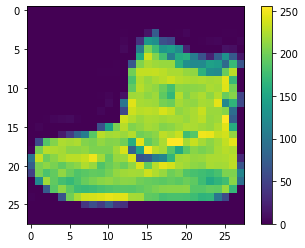

In [3]:
#显示图片
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

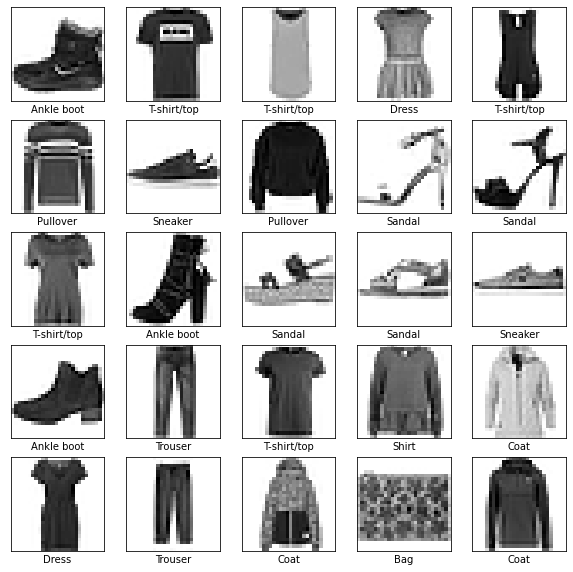

In [4]:
#正则化
train_images = train_images / 255.0
test_images = test_images / 255.0
#显示前25图片
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  #plt.imshow(train_images[i])
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


In [5]:
#构建模型，使用Sequential
model=keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128,activation='relu'),
  keras.layers.Dense(10)
])
model.compile(optimizer='adam',
       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
       metrics=['accuracy']
)
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5015 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3766 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3359 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3123 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2952 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2807 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2677 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2565 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2475 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.23

##模型的评估和预测

In [6]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)

print('\nTest accuracy:',test_acc)

313/313 - 1s - loss: 0.3352 - accuracy: 0.8825 - 522ms/epoch - 2ms/step

Test accuracy: 0.8824999928474426


In [7]:
#predict
predict_model=tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])
predictions=predict_model.predict(test_images)
predictions[0]

array([3.1446407e-07, 5.9737516e-08, 1.2721461e-06, 1.7142388e-09,
       4.2699071e-08, 7.9686266e-05, 3.4653652e-07, 8.2858121e-03,
       2.9156212e-07, 9.9163228e-01], dtype=float32)

In [10]:
print(class_names[np.argmax(predictions[0])])

Ankle boot


In [12]:
#显示预测结果
def plot_img(i,prediction_array,true_label,img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[i],cmap=plt.cm.binary)

  predict_label=np.argmax(prediction_array[i])
  if predict_label==true_label[i]:
    color='blue'
  else:
    color='red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predict_label],100*np.max(prediction_array[i]),class_names[true_label[i]],color=color))

def plot_value_array(i,predictions_array,true_label):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot=plt.bar(range(10),predictions_array[i],color='#777777')
  plt.ylim([0,1])
  predict_label=np.argmax(predictions_array[i])

  thisplot[predict_label].set_color('red')
  thisplot[true_label[i]].set_color('blue')



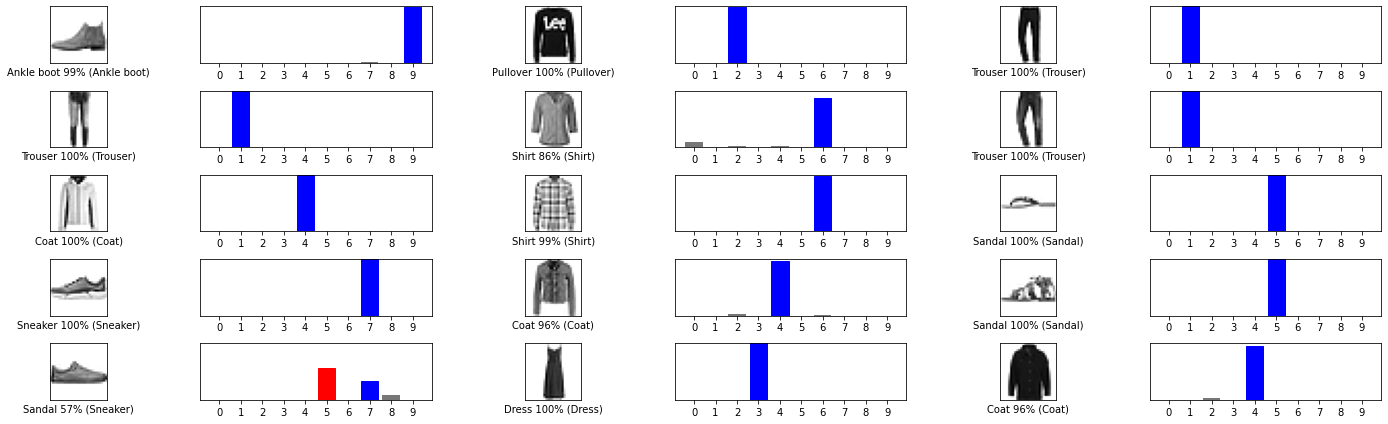

In [13]:
num_rows=5
num_cols=3
plt.figure(figsize=(2*2*num_rows,2*num_cols))
for i in range(num_rows*num_cols):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_img(i,predictions,test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions,test_labels)
plt.tight_layout()
plt.show()